In [172]:
import pandas as pd
import openpyxl

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import *
%matplotlib inline  
import numpy as np
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

In [173]:
pd.__version__

'1.5.3'

In [174]:
import sklearn
sklearn.__version__

'1.2.2'

In [175]:
#df = pd.read_csv("GermanCreditData.csv")

In [176]:
df = pd.read_excel("GermanCreditData.xlsx", sheet_name="Sheet1")

In [177]:
df

,Checking,Duration,History,Purpose,Amount,Savings,Emploed,Installp,marital,Coapp,...,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign,Bad,Good
0,1,6,4,3,1169,5,5,4,3,1,...,67,3,2,2,3,1,2,1,0,1
1,2,48,2,3,5951,1,3,2,2,1,...,22,3,2,1,3,1,1,1,1,0
2,4,12,4,6,2096,1,4,2,3,1,...,49,3,2,1,2,2,1,1,0,1
3,1,42,2,2,7882,1,4,2,3,3,...,45,3,3,1,3,2,1,1,0,1
4,1,24,3,0,4870,1,3,3,3,1,...,53,3,3,2,3,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,2,1736,1,4,3,2,1,...,31,3,2,1,2,1,1,1,0,1
996,1,30,2,1,3857,1,3,4,1,1,...,40,3,2,1,4,1,2,1,0,1
997,4,12,2,3,804,1,5,4,3,1,...,38,3,2,1,3,1,1,1,0,1
998,1,45,2,3,1845,1,3,4,3,1,...,23,3,3,1,3,1,2,1,1,0


## Checking for missing data

There are no NAN values, however, the Purpose column contains "X" - we will delete them because there are not that many instances and we would not lose a lot of data

<Figure size 2000x600 with 0 Axes>

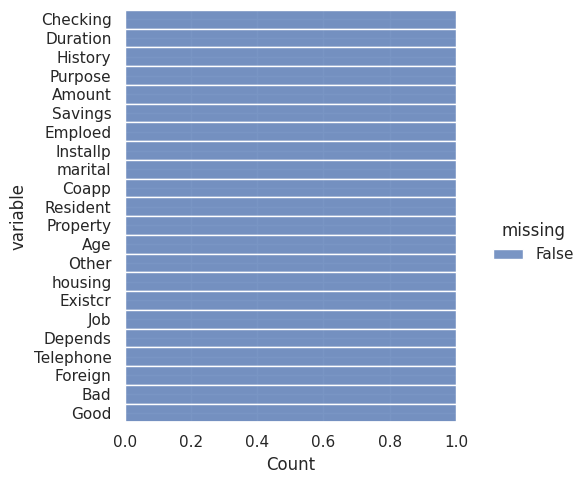

In [178]:
plt.figure(figsize=(20,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1
)


<Axes: >

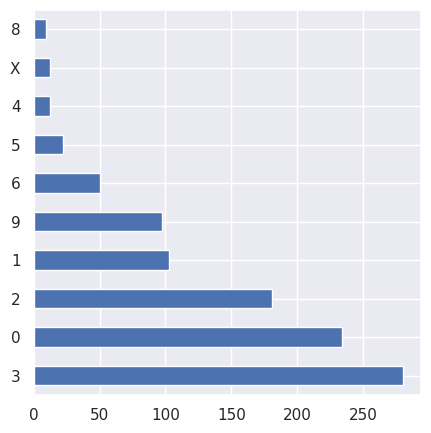

In [179]:
df.Purpose.value_counts().plot(kind="barh")

In [180]:
df = df[df.Purpose != "X"]

## 1. Splitting the dataset

In [181]:
sample1 = df[(df.Checking == 1) | (df.Checking == 2)]

In [182]:
sample2 = df[(df.Checking == 3) | (df.Checking == 4)]

In [183]:
len(sample2)

456

In [184]:
sample1.describe().T

,count,mean,std,min,25%,50%,75%,max
Checking,532.0,1.492481,0.500414,1.0,1.00,1.0,2.0,2.0
Duration,532.0,21.774436,12.551283,6.0,12.00,18.0,27.0,72.0
History,532.0,2.357143,1.073691,0.0,2.00,2.0,3.0,4.0
Amount,532.0,3397.417293,2910.619052,276.0,1350.25,2410.5,4243.0,15945.0
Savings,532.0,1.832707,1.436746,1.0,1.00,1.0,2.0,5.0
Emploed,532.0,3.253759,1.226468,1.0,2.00,3.0,4.0,5.0
Installp,532.0,2.977444,1.133075,1.0,2.00,3.0,4.0,4.0
marital,532.0,2.669173,0.736171,1.0,2.00,3.0,3.0,4.0
Coapp,532.0,1.201128,0.564951,1.0,1.00,1.0,1.0,3.0
Resident,532.0,2.864662,1.121822,1.0,2.00,3.0,4.0,4.0


## Sample 1

Given we are required to select features with more than 2 categories, we are dropping those that only have two as well as the "BAD" column, and keep the GOOD column

In [185]:
# variable selection - telephone & foreign worker not suitable

#df.drop("Good", inplace=True, axis=1)
sample1.drop("Bad", inplace=True, axis=1)
sample1.drop("Foreign", inplace=True, axis=1)
sample1.drop("Telephone", inplace=True, axis=1)

sample2.drop("Bad", inplace=True, axis=1)
sample2.drop("Foreign", inplace=True, axis=1)
sample2.drop("Telephone", inplace=True, axis=1)

## Statistical Analysis of independent and dependent variable - Feature Selection

## sample 1

Dependent variable is categorical so we can use t-test for continuous and chi-square test for categorical data (or transform continuous to categorical data by binning 

SS:
- Checking 
- Savings 
- Coapp
- housing 
- History 

In [186]:
sample1.columns

Index(['Checking', 'Duration', 'History', 'Purpose', 'Amount', 'Savings',
       'Emploed', 'Installp', 'marital', 'Coapp', 'Resident', 'Property',
       'Age', 'Other', 'housing', 'Existcr', 'Job', 'Depends', 'Good'],
      dtype='object')

In [187]:
obs_table = pd.crosstab([sample1['Good']],[sample1['Checking']])

In [188]:
obs_table

Checking,1,2
Good,,
0,134,101
1,136,161


In [189]:
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print( 'chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS

chi2:6.177937008181173
dof:1
p:0.012935300820977753


In [190]:
obs_table = pd.crosstab([sample1['Good']],[sample1['Job']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS

chi2:3.7464985522123326
dof:3
p:0.29017087856803153


In [191]:
obs_table = pd.crosstab([sample1['Good']],[sample1['Other']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS

chi2:1.390665428080244
dof:2
p:0.49890842652959144


In [192]:
obs_table = pd.crosstab([sample1['Good']],[sample1['Resident']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS

chi2:4.389271295815197
dof:3
p:0.22238225144715


In [193]:
obs_table = pd.crosstab([sample1['Good']],[sample1['housing']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS

chi2:9.976241637907966
dof:2
p:0.00681846559197483


In [194]:
obs_table = pd.crosstab([sample1['Good']],[sample1['Existcr']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS

chi2:2.424640039658652
dof:3
p:0.4890643692139103


In [195]:
obs_table = pd.crosstab([sample1['Good']],[sample1['marital']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS

chi2:6.162533603413445
dof:3
p:0.10396488307682011


In [196]:
obs_table = pd.crosstab([sample1['Good']],[sample1['Purpose']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS

chi2:15.970803343705233
dof:8
p:0.0427999173714587


In [197]:
obs_table = pd.crosstab([sample1['Good']],[sample1['Emploed']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS

chi2:4.874367584468706
dof:4
p:0.30043275677271136


In [198]:
obs_table = pd.crosstab([sample1['Good']],[sample1['Savings']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS

chi2:18.91001797082176
dof:4
p:0.000818589522651784


In [199]:
obs_table = pd.crosstab([sample1['Good']],[sample1['Coapp']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  # SS

chi2:9.923945284079352
dof:2
p:0.006999107472115305


In [200]:
obs_table = pd.crosstab([sample1['Good']],[sample1['Depends']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  # SS

chi2:0.30700635235705154
dof:1
p:0.5795230434401704


In [201]:
obs_table = pd.crosstab([sample1['Good']],[sample1['History']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  # SS

chi2:26.259982999724677
dof:4
p:2.8045232501618893e-05


In [202]:
obs_table = pd.crosstab([sample1['Good']],[sample1['Property']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  # SS

chi2:26.232447625141457
dof:3
p:8.52617737666502e-06


In [203]:
# binning: age, duration, amount
# SS: amount, duration

In [204]:
bins = [0, 1000, 5000, 10000, 15000, 20000]
labels = [1,2,3,4,5]
sample1['amount_binned'] = pd.cut(sample1['Amount'], bins=bins, labels=labels)

In [205]:
obs_table = pd.crosstab([sample1['amount_binned']],[sample1['Good']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  # SS

chi2:11.828048765191713
dof:4
p:0.018676812186941893


In [206]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = [1,2,3,4,5,6,7,8]
sample1['duration_binned'] = pd.cut(sample1['Duration'], bins=bins, labels=labels)

obs_table = pd.crosstab([sample1['duration_binned']],[sample1['Good']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  # SS

chi2:36.23813150002827
dof:6
p:2.4778758196277163e-06


In [207]:
bins = [18, 30, 40, 50, 60, 70, 80]
labels = [1,2,3,4,5,6]
sample1['age_binned'] = pd.cut(sample1['Age'], bins=bins, labels=labels)

obs_table = pd.crosstab([sample1['age_binned']],[sample1['Good']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  # SS

chi2:5.204403035395487
dof:5
p:0.39144745169875156


### Same for sample 2

In [208]:
obs_table = pd.crosstab([sample2['Good']],[sample2['Checking']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print("Checking ",'chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS

obs_table = pd.crosstab([sample2['Good']],[sample2['Job']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print("Job ", 'chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS

obs_table = pd.crosstab([sample2['Good']],[sample2['Other']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print("Other ", 'chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS

obs_table = pd.crosstab([sample2['Good']],[sample2['Resident']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print("Resident ",'chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS

obs_table = pd.crosstab([sample2['Good']],[sample2['housing']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print("housing ",'chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS

obs_table = pd.crosstab([sample2['Good']],[sample2['Existcr']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print("Existcr ",'chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS

obs_table = pd.crosstab([sample2['Good']],[sample2['marital']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print("marital ",'chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS

obs_table = pd.crosstab([sample2['Good']],[sample2['Purpose']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print("purpose ", 'chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS

obs_table = pd.crosstab([sample2['Good']],[sample2['Emploed']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print("employed",'chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS

obs_table = pd.crosstab([sample2['Good']],[sample2['Savings']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print("savings", 'chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  #SS


obs_table = pd.crosstab([sample2['Good']],[sample2['Coapp']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print("coapp",'chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  # SS

obs_table = pd.crosstab([sample2['Good']],[sample2['Depends']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print("depends",'chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  # SS

obs_table = pd.crosstab([sample2['Good']],[sample2['History']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print("history", 'chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  # SS

obs_table = pd.crosstab([sample2['Good']],[sample2['Property']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print("property",'chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  # SS

Checking  chi2:4.376008724100328
dof:1
p:0.0364482509389091
Job  chi2:4.359074432788903
dof:3
p:0.22521027043013417
Other  chi2:21.742992628026595
dof:2
p:1.899193174446362e-05
Resident  chi2:3.381892877779613
dof:3
p:0.336406350265681
housing  chi2:1.7817777777777772
dof:2
p:0.41029088760287846
Existcr  chi2:0.7712816166825196
dof:3
p:0.8563230288927067
marital  chi2:2.2736613132335055
dof:3
p:0.5175854703751039
purpose  chi2:20.66559349407031
dof:8
p:0.00809084796263785
employed chi2:15.241528024131677
dof:4
p:0.00422561570909347
savings chi2:3.10648411916135
dof:4
p:0.5401663604100281
coapp chi2:3.0225510354840606
dof:2
p:0.22062838299096693
depends chi2:0.5926504629629636
dof:1
p:0.44139602746890705
history chi2:12.821721167402664
dof:4
p:0.012180560338135752
property chi2:0.4135394828706716
dof:3
p:0.9374315697309954


Checking (-), Other, purpose, employed, history

In [209]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = [1,2,3,4,5,6,7,8]
sample2['duration_binned'] = pd.cut(sample2['Duration'], bins=bins, labels=labels)

bins = [18, 30, 40, 50, 60, 70, 80]
labels = [1,2,3,4,5,6]
sample2['age_binned'] = pd.cut(sample2['Age'], bins=bins, labels=labels)

bins = [0, 1000, 5000, 10000, 15000, 20000]
labels = [1,2,3,4,5]
sample2['amount_binned'] = pd.cut(sample2['Amount'], bins=bins, labels=labels)

In [210]:
obs_table = pd.crosstab([sample2['amount_binned']],[sample2['Good']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  # SS


obs_table = pd.crosstab([sample2['duration_binned']],[sample2['Good']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  # SS

obs_table = pd.crosstab([sample2['age_binned']],[sample2['Good']])
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))  # SS

chi2:5.792309557813048
dof:4
p:0.21520490326402458
chi2:7.060952685264805
dof:5
p:0.21614650809894928
chi2:5.443206788475331
dof:5
p:0.3642136591525809


In [211]:
sample2.Good.value_counts()

1    396
0     60
Name: Good, dtype: int64

<Axes: >

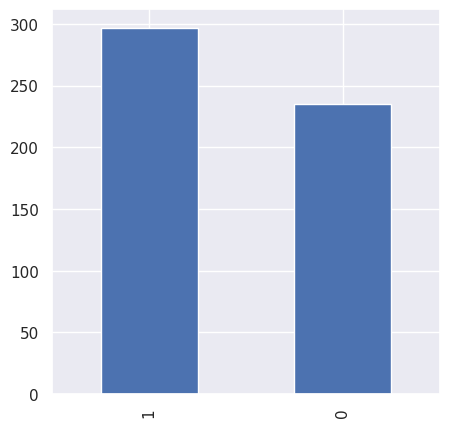

In [212]:
sample1.Good.value_counts().plot(kind="bar")

<Axes: >

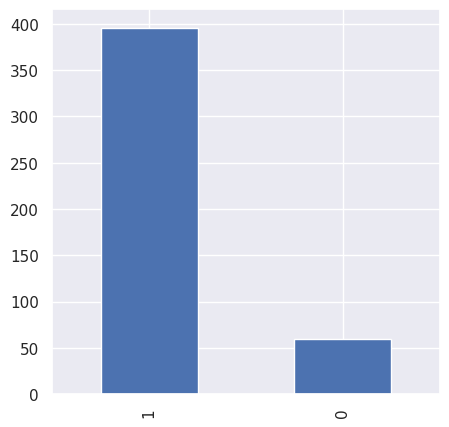

In [213]:
sample2.Good.value_counts().plot(kind="bar")

## Final Feature Selection Sample 1

For sample 1 we will be using the features history, Duration, property and Coapp, whereas for sample 2 we will be using Other, purpose, employed and history

<Axes: xlabel='History'>

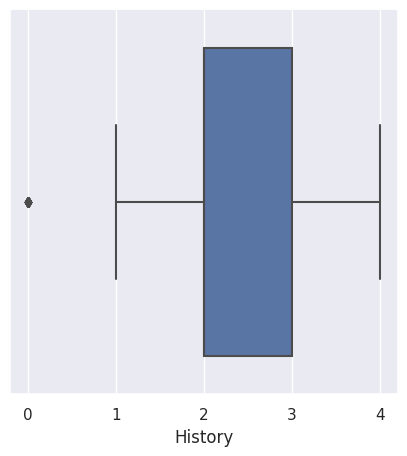

In [214]:
sns.boxplot(x=sample1["History"])

<Axes: xlabel='Property'>

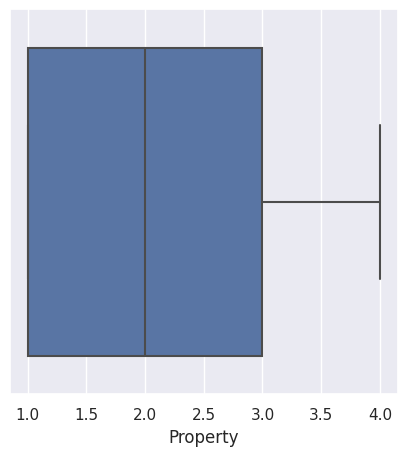

In [215]:
sns.boxplot(x=sample1["Property"])

<Axes: xlabel='Savings'>

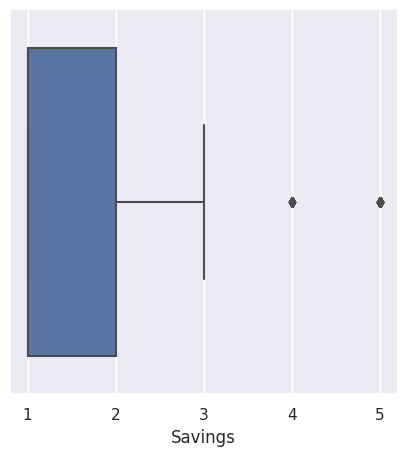

In [216]:
sns.boxplot(x=sample1["Savings"])

In [217]:
sample_1_onehot = pd.get_dummies(sample1[["History", "duration_binned", "Property", "Savings"]], columns=["History", "duration_binned", "Property", "Savings"])

In [218]:
sample_1_onehot["Good"] = sample1["Good"]

In [219]:
sample_1_onehot

,History_0,History_1,History_2,History_3,History_4,duration_binned_1,duration_binned_2,duration_binned_3,duration_binned_4,duration_binned_5,...,Property_1,Property_2,Property_3,Property_4,Savings_1,Savings_2,Savings_3,Savings_4,Savings_5,Good
0,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
7,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
993,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
996,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
998,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0


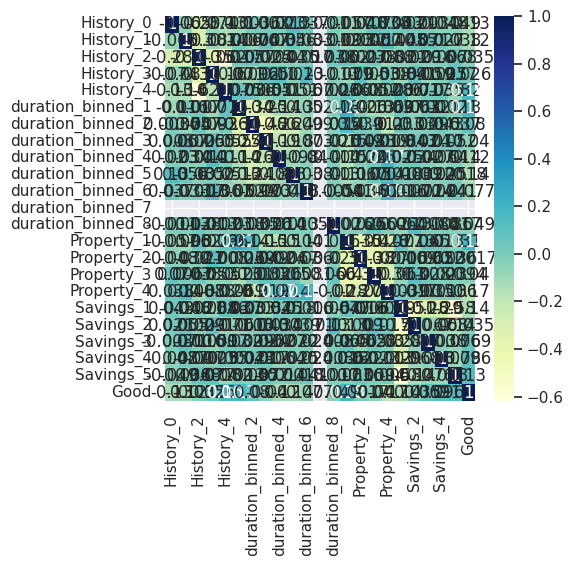

In [220]:
dataplot = sns.heatmap(sample_1_onehot.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap

sns.set(rc={'figure.figsize':(5,5)})

In [221]:
#deleting one to avoid multicoliniarity trap
sample_1_onehot.drop("History_2", inplace=True, axis=1)
sample_1_onehot.drop("duration_binned_2", inplace=True, axis=1)
sample_1_onehot.drop("Property_1", inplace=True, axis=1)
sample_1_onehot.drop("Savings_5", inplace=True, axis=1)


## Final Feature Selection - Sample2

<Axes: xlabel='History'>

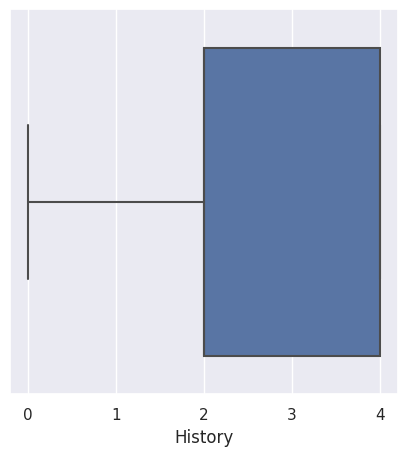

In [222]:
sns.boxplot(x=sample2["History"])

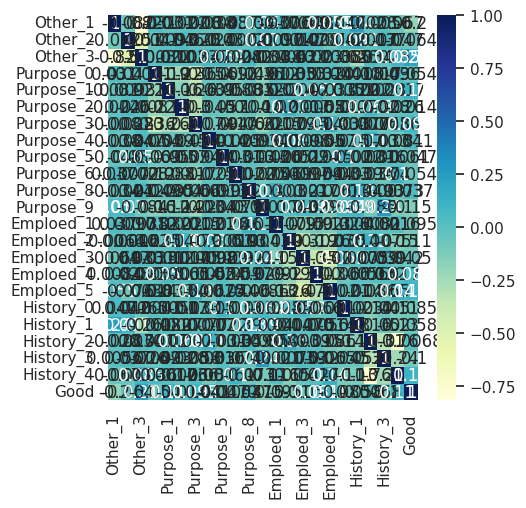

In [223]:
sample_2_onehot = pd.get_dummies(sample2[["Other", "Purpose", "Emploed", "History"]], columns=["Other", "Purpose", "Emploed", "History"])
sample_2_onehot["Good"] = sample2["Good"]

dataplot = sns.heatmap(sample_2_onehot.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap

sns.set(rc={'figure.figsize':(10,10)})

In [224]:
sample_2_onehot.drop("Other_3", inplace=True, axis=1)
sample_2_onehot.drop("Purpose_3", inplace=True, axis=1)
sample_2_onehot.drop("Emploed_5", inplace=True, axis=1)
sample_2_onehot.drop("History_4", inplace=True, axis=1)

## Logistic regression model Sample 1

In [225]:
split_train, split_test = train_test_split(
    sample_1_onehot, stratify=sample_1_onehot["Good"], test_size=0.10, random_state=5)

In [226]:
clf = LogisticRegression()

In [227]:
sns.set(rc={'figure.figsize':(5,5)})

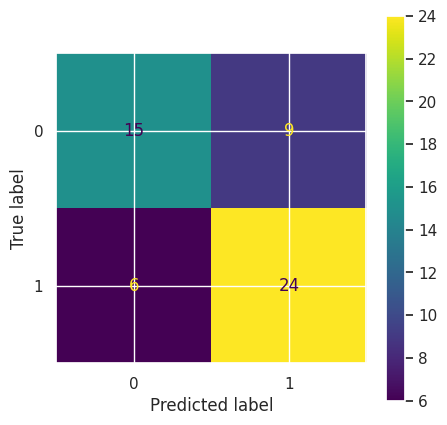

              precision    recall  f1-score   support

           0     0.7143    0.6250    0.6667        24
           1     0.7273    0.8000    0.7619        30

    accuracy                         0.7222        54
   macro avg     0.7208    0.7125    0.7143        54
weighted avg     0.7215    0.7222    0.7196        54



In [228]:
y_train = split_train["Good"]
X_train = split_train.drop("Good", axis=1)
y_test = split_test["Good"]
X_test = split_test.drop("Good", axis=1)
lg_model = clf.fit(X_train,y_train)
predictions_logreg = lg_model.predict(X_test)
cm = confusion_matrix(y_test, predictions_logreg, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()
print(classification_report(y_test, predictions_logreg, digits=4))

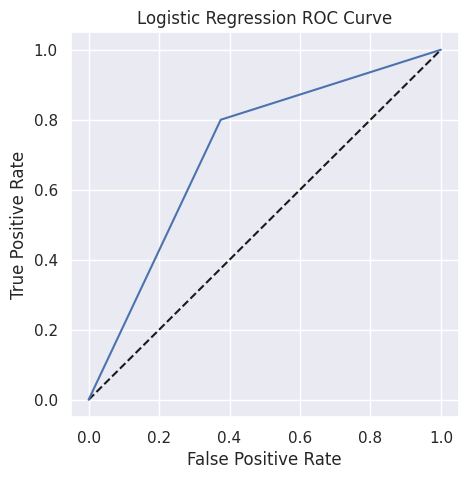

In [229]:
fpr, tpr, thresholds = roc_curve(y_test, predictions_logreg)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()


In [230]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.linspace(0, 2, 20),
              "solver":["newton-cg", "lbfgs", "liblinear"], 
              "class_weight":["balanced", None], 
              "penalty": ["l1", "l2", "elasticnet", "none"]}
grid_search = GridSearchCV(clf, parameters, cv=10)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [231]:
print('best parameters: ', grid_search.best_params_)
print('best scores: ', grid_search.best_score_)

best parameters:  {'C': 0.42105263157894735, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}
best scores:  0.6549645390070922


In [232]:
coefs = lg_model.coef_.flatten()
feature_names = lg_model.feature_names_in_

# Zip coefficients and names together and make a DataFrame
zipped = zip(feature_names, coefs)
df = pd.DataFrame(zipped, columns=["feature", "value"])# Sort the features by the absolute value of their coefficient
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["label"] = df["value"].apply(lambda x: "Good" if x > 0 else "Bad")
df = df.sort_values("abs_value", ascending=False)

df

,feature,value,abs_value,label
14,Savings_1,-0.917984,0.917984,Bad
13,Property_4,-0.879915,0.879915,Bad
7,duration_binned_5,-0.812115,0.812115,Bad
15,Savings_2,-0.770549,0.770549,Bad
4,duration_binned_1,0.693257,0.693257,Good
3,History_4,0.686045,0.686045,Good
6,duration_binned_4,-0.616710,0.616710,Bad
1,History_1,-0.522261,0.522261,Bad
8,duration_binned_6,-0.500801,0.500801,Bad
11,Property_2,-0.454209,0.454209,Bad


## Logistic regression model Sample 2

In [233]:
#trying downsampling
split_train_2, split_test_2 = train_test_split(
    sample_2_onehot, stratify=sample_2_onehot["Good"], test_size=0.10, random_state=5)

In [234]:
sample_2_train_good =split_train_2[split_train_2.Good == 1]
sample_2_train_bad =split_train_2[split_train_2.Good == 0]

In [235]:
sample = sample_2_train_good.sample(60)
split_train_2 = pd.concat([sample_2_train_bad, sample])

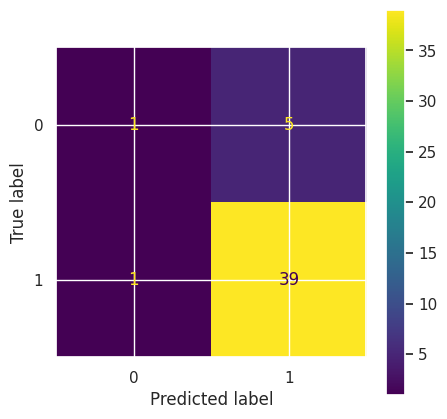

              precision    recall  f1-score   support

           0     0.5000    0.1667    0.2500         6
           1     0.8864    0.9750    0.9286        40

    accuracy                         0.8696        46
   macro avg     0.6932    0.5708    0.5893        46
weighted avg     0.8360    0.8696    0.8401        46



In [236]:
split_train_2, split_test_2 = train_test_split(
    sample_2_onehot, stratify=sample_2_onehot["Good"], test_size=0.10, random_state=5)

clf_2 = LogisticRegression(C=10)

y_train_2 = split_train_2["Good"]
X_train_2 = split_train_2.drop("Good", axis=1)
y_test_2 = split_test_2["Good"]
X_test_2 = split_test_2.drop("Good", axis=1)
lg_model_2 = clf_2.fit(X_train_2,y_train_2)
predictions_logreg_2 = lg_model_2.predict(X_test_2)
cm2 = confusion_matrix(y_test_2, predictions_logreg_2, labels=clf_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clf_2.classes_)
disp.plot()
plt.show()
print(classification_report(y_test_2, predictions_logreg_2, digits=4))

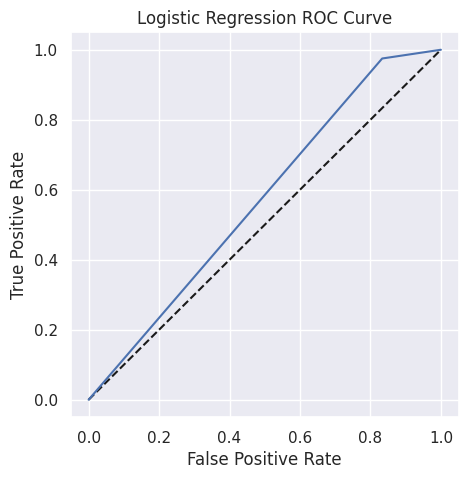

In [237]:
fpr, tpr, thresholds = roc_curve(y_test_2, predictions_logreg_2)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Linear Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [238]:
coefs = lg_model_2.coef_.flatten()
feature_names = lg_model_2.feature_names_in_

# Zip coefficients and names together and make a DataFrame
zipped = zip(feature_names, coefs)
df = pd.DataFrame(zipped, columns=["feature", "value"])# Sort the features by the absolute value of their coefficient
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["label"] = df["value"].apply(lambda x: "Good" if x > 0 else "Bad")
df = df.sort_values("abs_value", ascending=False)

df

,feature,value,abs_value,label
10,Emploed_1,-1.698675,1.698675,Bad
6,Purpose_5,-1.597717,1.597717,Bad
0,Other_1,-1.552770,1.552770,Bad
17,History_3,-1.221352,1.221352,Bad
3,Purpose_1,1.209695,1.209695,Good
5,Purpose_4,1.201106,1.201106,Good
14,History_0,-1.138674,1.138674,Bad
11,Emploed_2,-1.113625,1.113625,Bad
8,Purpose_8,1.047638,1.047638,Good
9,Purpose_9,-0.956034,0.956034,Bad


## Linear Model Sample 1

In [239]:
linear_reg  =LinearRegression()

lr_model = linear_reg.fit(X_train,y_train)
predictions_linreg = lr_model.predict(X_test)

In [240]:
predictions_linreg = np.where(predictions_linreg > 0.5, 1, 0)

In [241]:
predictions_linreg

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1])

In [242]:
lr_model.coef_

array([-1.08245760e-01, -1.28291959e-01,  1.18467369e-01,  1.51358877e-01,
        1.36480114e-01, -3.54633348e-02, -1.68361823e-01, -2.08571946e-01,
       -2.15265830e-01, -9.15933995e-16, -5.29516710e-01, -1.12614820e-01,
       -1.02162460e-01, -2.03907471e-01, -2.23182249e-01, -1.94124487e-01,
       -2.95772160e-02,  4.08168056e-03])

In [243]:
lr_model.intercept_

0.8258036567208189

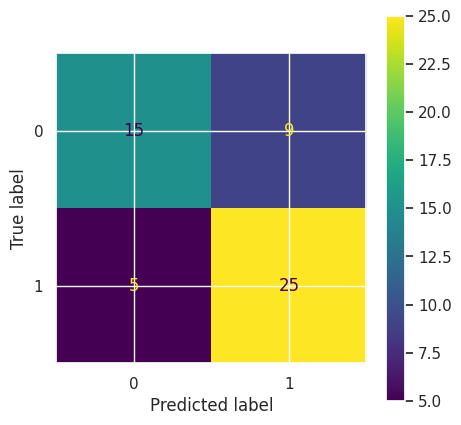

              precision    recall  f1-score   support

           0     0.7500    0.6250    0.6818        24
           1     0.7353    0.8333    0.7812        30

    accuracy                         0.7407        54
   macro avg     0.7426    0.7292    0.7315        54
weighted avg     0.7418    0.7407    0.7371        54



In [244]:
cm2 = confusion_matrix(y_test, predictions_linreg, labels=clf_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clf_2.classes_)
disp.plot()
plt.show()
print(classification_report(y_test, predictions_linreg, digits=4))

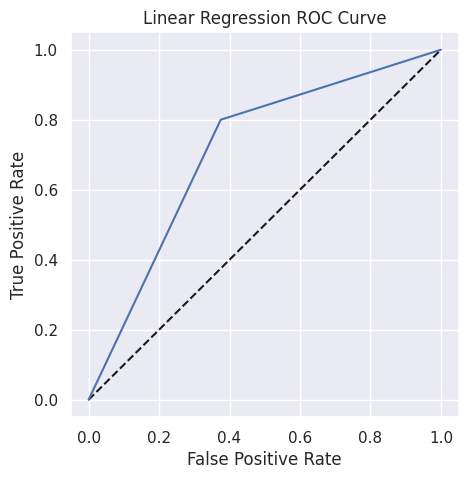

In [245]:
fpr, tpr, thresholds = roc_curve(y_test, predictions_logreg)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Linear Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Regression ROC Curve')
plt.show()

## Linear Model Sample 2

In [246]:
linear_reg  =LinearRegression()

lr_model_2 = linear_reg.fit(X_train_2,y_train_2)
predictions_linreg_2 = lr_model_2.predict(X_test_2)

In [247]:
predictions_linreg_2

array([0.80698452, 1.01094063, 0.94052208, 0.85185908, 0.74206394,
       0.96220783, 0.9260344 , 0.96818146, 0.73253558, 0.96220783,
       0.83284869, 1.0460216 , 0.94818943, 0.9400528 , 0.96818146,
       0.77428942, 1.00496701, 0.98219986, 0.81854955, 0.77428942,
       0.76423277, 0.67392367, 0.78651685, 0.77428942, 0.83873435,
       0.96704866, 0.85185908, 0.89776291, 0.99094861, 0.76002366,
       0.97270083, 0.74168754, 0.61439853, 0.85475637, 0.94818943,
       0.85185908, 0.74375767, 1.09471408, 0.93485399, 0.82471595,
       0.77428942, 0.82471595, 1.09471408, 0.52714142, 0.48475865,
       0.9400528 ])

In [248]:
predictions_linreg_2 = np.where(predictions_linreg_2 > 0.5, 1, 0)

In [249]:
lr_model_2.coef_

array([-0.21845017, -0.10745147, -0.06444493,  0.06975504, -0.0140184 ,
        0.09611964, -0.20751722, -0.08819372,  0.13396648, -0.13306085,
       -0.21234066, -0.12347348, -0.06491421,  0.01999202, -0.17239906,
       -0.02799768, -0.04275918, -0.13306828])

In [250]:
lr_model_2.intercept_

1.004967012869712

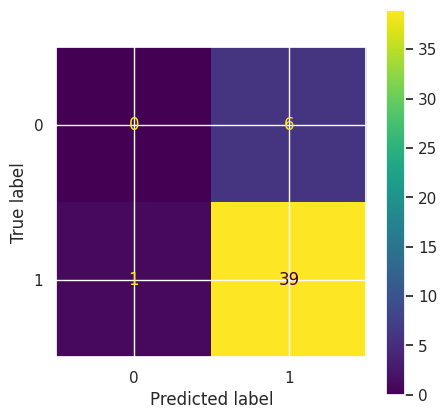

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         6
           1     0.8667    0.9750    0.9176        40

    accuracy                         0.8478        46
   macro avg     0.4333    0.4875    0.4588        46
weighted avg     0.7536    0.8478    0.7980        46



In [251]:
cm2 = confusion_matrix(y_test_2, predictions_linreg_2, labels=clf_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clf_2.classes_)
disp.plot()
plt.show()
print(classification_report(y_test_2, predictions_linreg_2, digits=4))

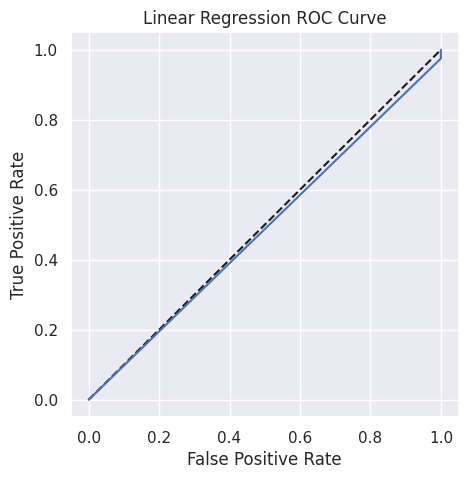

In [252]:
fpr, tpr, thresholds = roc_curve(y_test_2, predictions_linreg_2)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Linear Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Regression ROC Curve')
plt.show()

## ROC Curve and other metrics


In [253]:
c_matrix = confusion_matrix(y_test, predictions_logreg, labels=clf.classes_)

In [254]:
#logistic
print('Sensitivity for sample 1: ', c_matrix[0,0]/(c_matrix[0,0] + c_matrix[1,0]))
print('Specificity for sample 1: ',  c_matrix[1,1]/(c_matrix[0,1] + c_matrix[1,1]))

print('Area under the ROC curve of sample 1: ', roc_auc_score(y_test, predictions_logreg))


print('Gini coefficient for sample 1:', 2*roc_auc_score(y_test, predictions_logreg) - 1)

print('KS statistics value for sample 1: ', (c_matrix[1,1]/(c_matrix[0,1] + c_matrix[1,1])) - (c_matrix[1,0]/(c_matrix[0,0] + c_matrix[1,0])))

Sensitivity for sample 1:  0.7142857142857143
Specificity for sample 1:  0.7272727272727273
Area under the ROC curve of sample 1:  0.7125
Gini coefficient for sample 1: 0.42500000000000004
KS statistics value for sample 1:  0.4415584415584416


In [255]:
c_matrix = confusion_matrix(y_test, predictions_linreg, labels=clf.classes_)

In [256]:
#linear
print('Sensitivity for sample 1: ', c_matrix[0,0]/(c_matrix[0,0] + c_matrix[1,0]))
print('Specificity for sample 1: ',  c_matrix[1,1]/(c_matrix[0,1] + c_matrix[1,1]))

print('Area under the ROC curve of sample 1: ', roc_auc_score(y_test, predictions_linreg))


print('Gini coefficient for sample 1:', 2*roc_auc_score(y_test, predictions_linreg) - 1)

print('KS statistics value for sample 1: ', (c_matrix[1,1]/(c_matrix[0,1] + c_matrix[1,1])) - (c_matrix[1,0]/(c_matrix[0,0] + c_matrix[1,0])))

Sensitivity for sample 1:  0.75
Specificity for sample 1:  0.7352941176470589
Area under the ROC curve of sample 1:  0.7291666666666667
Gini coefficient for sample 1: 0.4583333333333335
KS statistics value for sample 1:  0.4852941176470589


In [257]:
c_matrix = confusion_matrix(y_test_2, predictions_logreg_2, labels=clf.classes_)

In [258]:
#log
print('Sensitivity for sample 2: ', c_matrix[0,0]/(c_matrix[0,0] + c_matrix[1,0]))
print('Specificity for sample 2: ',  c_matrix[1,1]/(c_matrix[0,1] + c_matrix[1,1]))

print('Area under the ROC curve of sample 2: ', roc_auc_score(y_test_2, predictions_logreg_2))


print('Gini coefficient for sample 2:', 2*roc_auc_score(y_test_2, predictions_logreg_2) - 1)

print('KS statistics value for sample 2: ', (c_matrix[1,1]/(c_matrix[0,1] + c_matrix[1,1])) - (c_matrix[1,0]/(c_matrix[0,0] + c_matrix[1,0])))

Sensitivity for sample 2:  0.5
Specificity for sample 2:  0.8863636363636364
Area under the ROC curve of sample 2:  0.5708333333333333
Gini coefficient for sample 2: 0.1416666666666666
KS statistics value for sample 2:  0.38636363636363635


In [259]:
c_matrix = confusion_matrix(y_test_2, predictions_linreg_2, labels=clf.classes_)

In [260]:
#lin
print('Sensitivity for sample 2: ', c_matrix[0,0]/(c_matrix[0,0] + c_matrix[1,0]))
print('Specificity for sample 2: ',  c_matrix[1,1]/(c_matrix[0,1] + c_matrix[1,1]))

print('Area under the ROC curve of sample 2: ', roc_auc_score(y_test_2, predictions_linreg_2))


print('Gini coefficient for sample 2:', 2*roc_auc_score(y_test_2, predictions_linreg_2) - 1)

print('KS statistics value for sample 2: ', (c_matrix[1,1]/(c_matrix[0,1] + c_matrix[1,1])) - (c_matrix[1,0]/(c_matrix[0,0] + c_matrix[1,0])))

Sensitivity for sample 2:  0.0
Specificity for sample 2:  0.8666666666666667
Area under the ROC curve of sample 2:  0.4875
Gini coefficient for sample 2: -0.025000000000000022
KS statistics value for sample 2:  -0.1333333333333333
